# Beautiful Recursion Graphs

This notebook is linked to the following
[blog post](https://harpaz.wordpress.com/2024/12/24/beautiful-recursion-graphs/)
, and is based on the following
[blog post](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/)
by [Steven Wolfram](https://writings.stephenwolfram.com/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functools import lru_cache

# Y will take most of (my) screen
FIG_MAX_Y = 16
FIG_DEFAULT_X = 2
plt.rcParams['figure.figsize'] = [FIG_MAX_Y, FIG_DEFAULT_X]
plt.rcParams['figure.dpi'] = 100

# Initial setup
Learning how to cache, how to plot, etc.

In [2]:
@lru_cache(maxsize=10_000)
def f(n):
    f.counter += 1
    if n in (1,2):
        return 1
    return f(f(n-1)) + f(n - 1 - f(n-2))
f.counter = 0

In [3]:
def map_(func, itr):
    return np.fromiter(map(func, itr), int)

In [4]:
%%timeit -n1 -r1
X = np.arange(1, 10+1)
map_(f,X)
print("Number of function calls:", f.counter)

Number of function calls: 14
381 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Recreating first wiggle graph

[link](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/#:~:text=a%20simple%20nestedly%20recursive%20function%20with%20what%20seemed%20like%20highly%20complex%20behavior)

<!-- ![Source image](https://content.wolfram.com/sites/43/2024/09/sw09192024surpriseimg4.png) -->
<img src="https://content.wolfram.com/sites/43/2024/09/sw09192024surpriseimg4.png" width=400 height=300 />

$f[n] = f[ f[n-1] ] + f[n - 1 - f[n-2]]$
</br>
With the initial conditions
</br>
$f[1] = f[2] = 1$

In [5]:
@lru_cache(maxsize=10_000)
def f_wiggle(n):
    if n in (1,2):
        return 1
    return f_wiggle(f_wiggle(n-1)) + f_wiggle(n - 1 - f_wiggle(n-2))

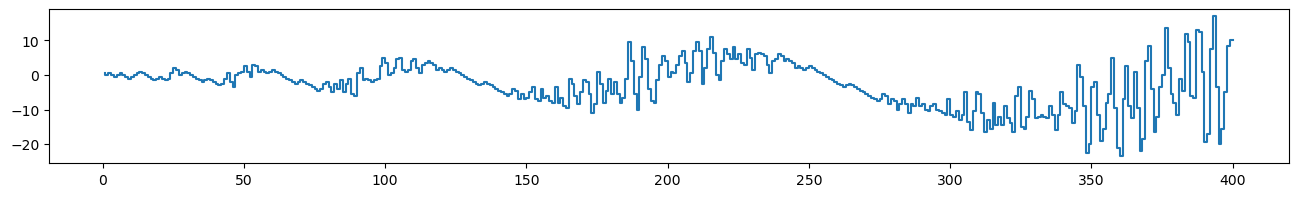

In [6]:
X = np.arange(1, 400+1)
plt.step(X, map_(f_wiggle,X) - X/2)

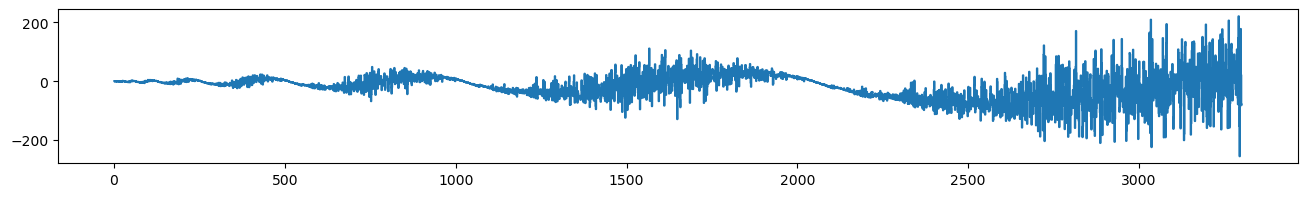

In [7]:
X = np.arange(1, 3_300+1)
plt.step(X, map_(f_wiggle,X) - X/2)

In [8]:
f_wiggle.cache_info()

CacheInfo(hits=19185, misses=5167, maxsize=10000, currsize=5167)

# Recreating P_3_1_2

[link](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/#a-closer-look-at-p312--fn--3--fn---fn---2)

<img src="https://content.wolfram.com/sites/43/2024/09/sw09192024Acloserimg2.png" width=400 height=300 />

In [9]:
@lru_cache(maxsize=10_000)
def P_3_1_2(n):
    if n <= 0:
        return 1
    return 3 + P_3_1_2(n - P_3_1_2(n-2))

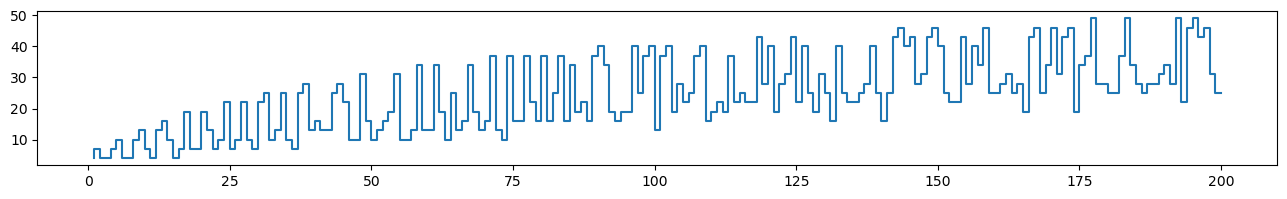

In [10]:
X = np.arange(1, 200+1)
plt.step(X, map_(P_3_1_2,X))

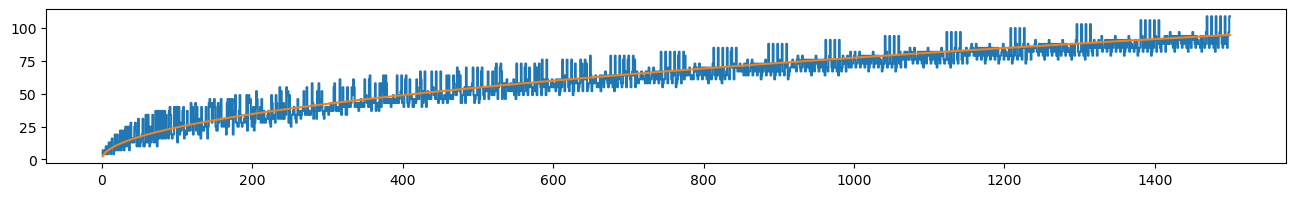

In [11]:
X = np.arange(1, 1_500+1)
plt.step(X, map_(P_3_1_2,X))
plt.plot(X, np.sqrt(6*X))

## Changing Initial Value

[link](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/#:~:text=But%20what%20if%20we%20change%20the%20value%20of%20f[0])

<img src="https://content.wolfram.com/sites/43/2024/09/sw09192024Acloserimg20.png" width=400 height=600 />

In [12]:
def P_3_1_2_parametric_initial_0(initial_0=1):
    @lru_cache(maxsize=10_000)
    def P_3_1_2(n):
        if n < 0:
            return 1
        elif n == 0:
            return initial_0
        else:
            return 3 + P_3_1_2(n - P_3_1_2(n-2))
    return P_3_1_2

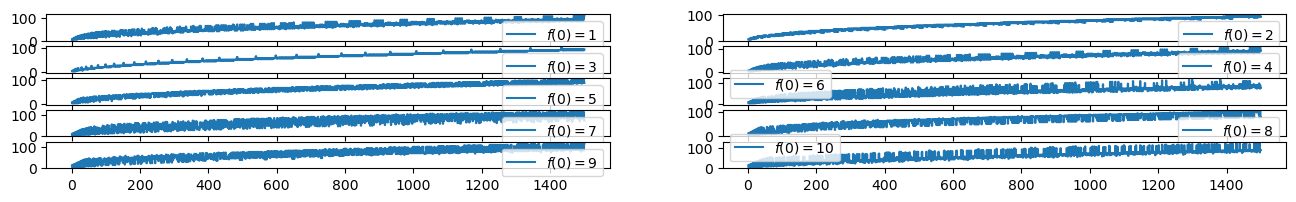

In [13]:
X = np.arange(1, 1_500+1)

initial_value_range = range(1, 10+1)
assert len(initial_value_range) % 2 == 0, "Expecting even amount of values"

nrows = len(initial_value_range) // 2
ncols = 2

for index, value in enumerate(initial_value_range):
    plt.subplot(nrows, ncols, index+1)
    plt.step(X, map_(P_3_1_2_parametric_initial_0(value),X), label=f"$f(0)={value}$")
    plt.legend()

# Hops

[link](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/#:~:text=Subtracting%20overall%20linear%20trends%20we%20get)

With $G_3 111$ being mentioned as "Some Crazy Sequence"
[link](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/#:~:text=Some%20Crazy%20Sequence)

<img src="https://content.wolfram.com/sites/43/2024/09/sw09232024rulesimg20.png" width=400 height=300 />

## Recreating the first sequence

In [14]:
def G_3(a, b, c):
    @lru_cache(maxsize=10_000)
    def G_3_a_b_c(n):
        if n <= 0:
            return 1
        if n in (1,2):
            return 1
        return G_3_a_b_c(n - a * G_3_a_b_c(n - b)) + G_3_a_b_c(G_3_a_b_c(n - c))

    G_3_a_b_c.name = f"G_3 {a} {b} {c}"
    return G_3_a_b_c

An initial test, to see how $G_3 111$ looks like
</br>
And to verify that the trend looks like $\frac{n}{2}$

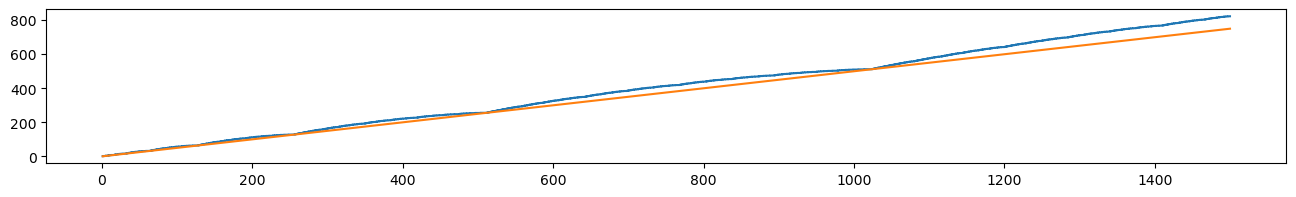

In [15]:
G_3_111 = G_3(1,1,1)
X = np.arange(1, 1_500+1)
plt.step(X, map_(G_3_111,X))
plt.plot(X, X/2)

## Recreating multiple sequences

Now let's create multiple $G_3$ functions

In [16]:
G_3_111 = G_3(1,1,1)
G_3_112 = G_3(1,1,2)
G_3_113 = G_3(1,1,3)
G_3_121 = G_3(1,2,1)
G_3_122 = G_3(1,2,2)
G_3_123 = G_3(1,2,3)

And plot them all

Plus, trying to guess the linear trend

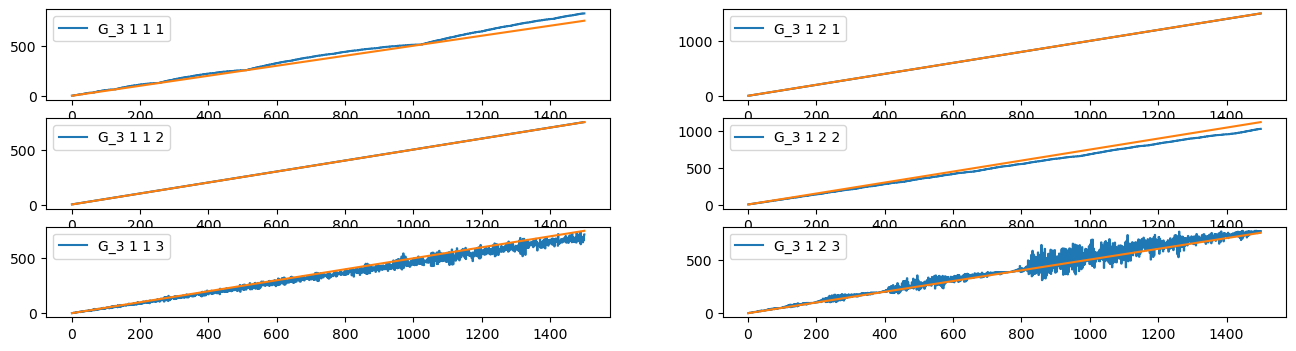

In [17]:
plt.rcParams['figure.figsize'] = [FIG_MAX_Y, 4]

X = np.arange(1, 1_500+1)

nrows = 3  # for [G_3_111, G_3_112, G_3_113] or [G_3_121, G_3_122, G_3_123]
ncols = 2

def _plot(index: int, func: "Callable", trend_factor: float, include_trend: bool = True):
    plt.subplot(nrows, ncols, index)
    plt.step(X, map_(func, X), label=func.name)
    if include_trend:
        plt.plot(X, X * trend_factor)
    plt.legend()

# G_3_111 ; trend: n/2
_plot(1, G_3_111, 1/2)

# G_3_112 ; trend: n/2
_plot(3, G_3_112, 1/2)

# G_3_113 ; trend: n/2
_plot(5, G_3_113, 1/2)

# G_3_121 ; trend: ?
_plot(2, G_3_121, 1)

# G_3_122 ; trend: ?
_plot(4, G_3_122, 3/4)

# G_3_123 ; trend: ?
_plot(6, G_3_123, 1/2)

## Guessing the linear trend

Plotting again, this time, removing the linear trend

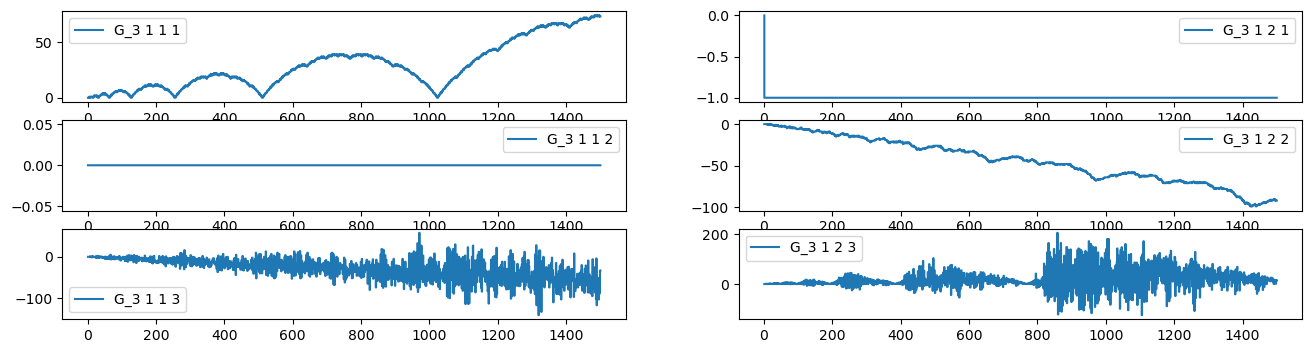

In [18]:
plt.rcParams['figure.figsize'] = [FIG_MAX_Y, 4]

X = np.arange(1, 1_500+1)

nrows = 3  # for [G_3_111, G_3_112, G_3_113] or [G_3_121, G_3_122, G_3_123]
ncols = 2

def _plot(index: int, func: "Callable", trend_factor: float):
    plt.subplot(nrows, ncols, index)

    def _func_without_linear_trend(x):
        return func(x) - x * trend_factor
    
    plt.step(X, map_(_func_without_linear_trend, X), label=func.name)
    plt.legend()

# G_3_111 ; trend: n/2
_plot(1, G_3_111, 1/2)

# G_3_112 ; trend: n/2
_plot(3, G_3_112, 1/2)

# G_3_113 ; trend: n/2
_plot(5, G_3_113, 1/2)

# G_3_121 ; trend: guess
_plot(2, G_3_121, 1)

# G_3_122 ; trend: guess
_plot(4, G_3_122, 3/4)

# G_3_123 ; trend: guess
_plot(6, G_3_123, 1/2)

## Calculating the linear trend

Okay. The linear trends are not great.

Maybe let's calculate them numerically? Using rolling average?

In [19]:
X = np.arange(1, 10_000+1)
values = map_(G_3_111, X)
values

array([   1,    1,    2, ..., 5372, 5372, 5373])

In [20]:
window = 10
average_values = np.array([
    np.mean(values[max(0, index-window):index+window])
    for index in range(len(values))
])
average_values

array([3.20000000e+00, 3.54545455e+00, 3.83333333e+00, ...,
       5.36853846e+03, 5.36891667e+03, 5.36927273e+03])

In [21]:
slope, intersection = np.polyfit(X, average_values, 1)
print(f"func = {intersection} + {slope} x")

func = 25.91781450524284 + 0.5229284852586692 x


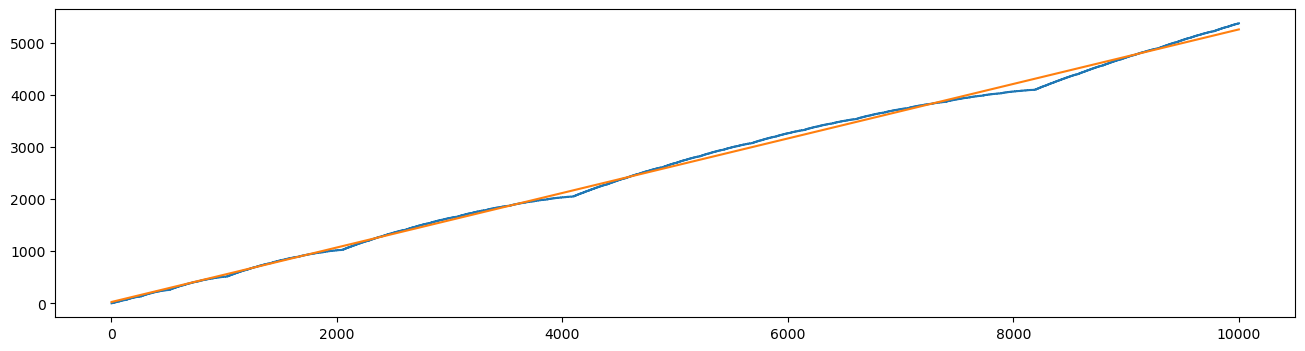

In [22]:
plt.step(X, values)
plt.plot(X, intersection + slope*X)

Let's plot it with fewer values, to see the resulution better

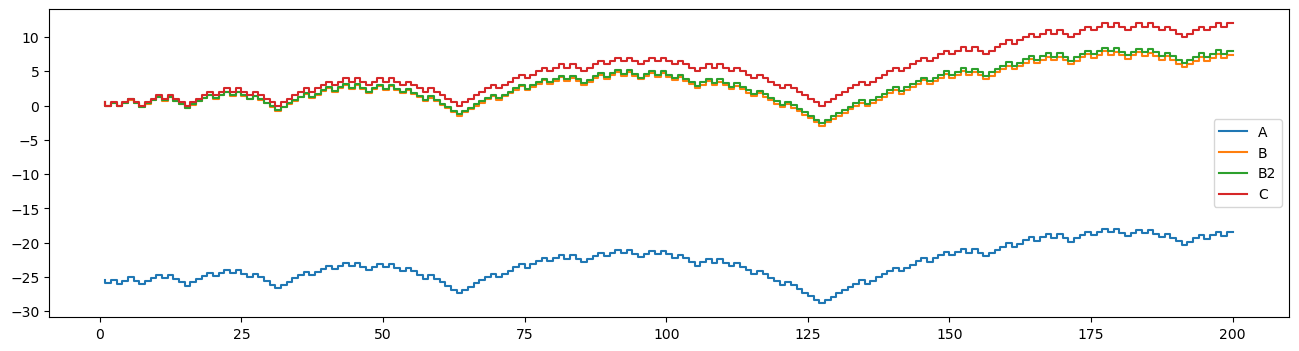

In [23]:
NN = 200
plt.step(X[:NN], values[:NN] - (intersection + slope*X[:NN]), label='A')
plt.step(X[:NN], values[:NN] - (0 + slope*X[:NN]), label='B')
plt.step(X[:NN], values[:NN] - (0 + round(slope,2)*X[:NN]), label='B2')
plt.step(X[:NN], values[:NN] - (0 + 0.5*X[:NN]), label='C')
plt.legend()

Let's automate it

In [24]:
def calculate_slope(func, window: int=10, silent: bool=False):
    X = np.arange(1, 10_000+1)
    values = map_(func, X)

    average_values = np.array([
        np.mean(values[max(0, index-window):index+window])
        for index in range(len(values))
    ])

    slope, intersection = np.polyfit(X, average_values, 1)
    if not silent:
        print(f"func = {intersection} + {slope} x")

    return slope, intersection

def plot_with_slope(func, slope, intersection):
    X = np.arange(1, 10_000+1)
    values = map_(func, X)
    plt.step(X, values)
    return plt.plot(X, intersection + slope*X)

def plot_without_slope(func, slope, intersection, theoretical_slope):
    X = np.arange(1, 200+1)
    values = map_(func, X)
    plt.step(X[:NN], values[:NN] - (intersection + slope*X[:NN]), label='slope and intersection')
    plt.step(X[:NN], values[:NN] - (0 + slope*X[:NN]), label='slope only')
    plt.step(X[:NN], values[:NN] - (0 + round(slope,2)*X[:NN]), label='slope rounded')
    plt.step(X[:NN], values[:NN] - (0 + theoretical_slope*X[:NN]), label=f'slope = {theoretical_slope}')
    return plt.legend()

func = 25.91781450524284 + 0.5229284852586692 x


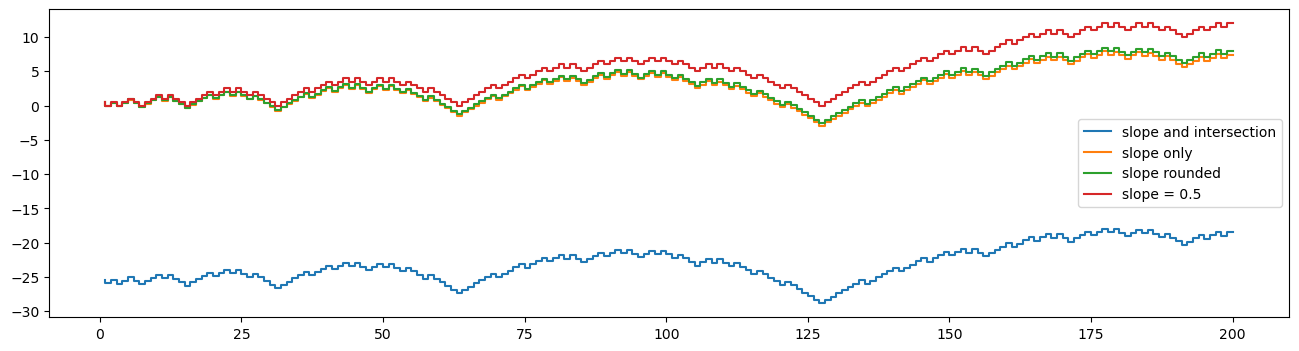

In [25]:
slope, intersection = calculate_slope(G_3_111)
plot_without_slope(G_3_111, slope, intersection, 1/2)

func = 0.007797576634620777 + 0.4999984906356081 x


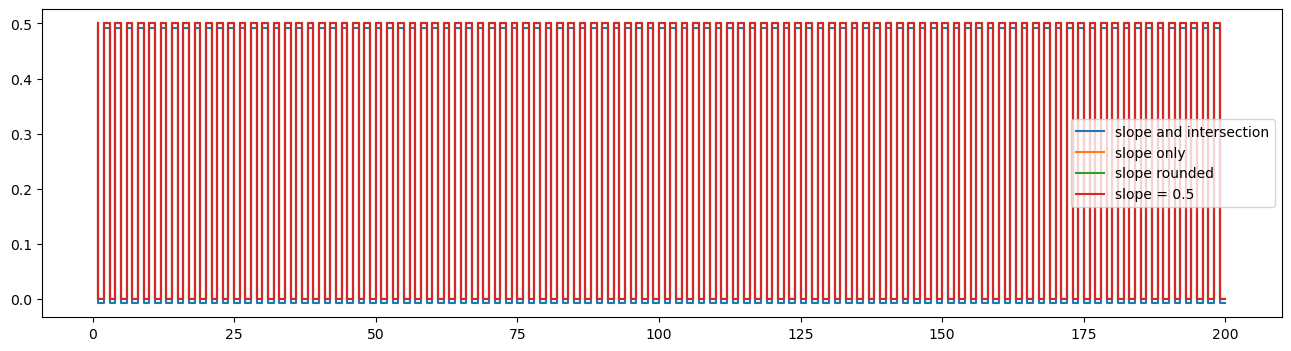

In [26]:
slope, intersection = calculate_slope(G_3_112)
plot_without_slope(G_3_112, slope, intersection, 1/2)

func = -0.9774145734615733 + 0.46196207483818164 x


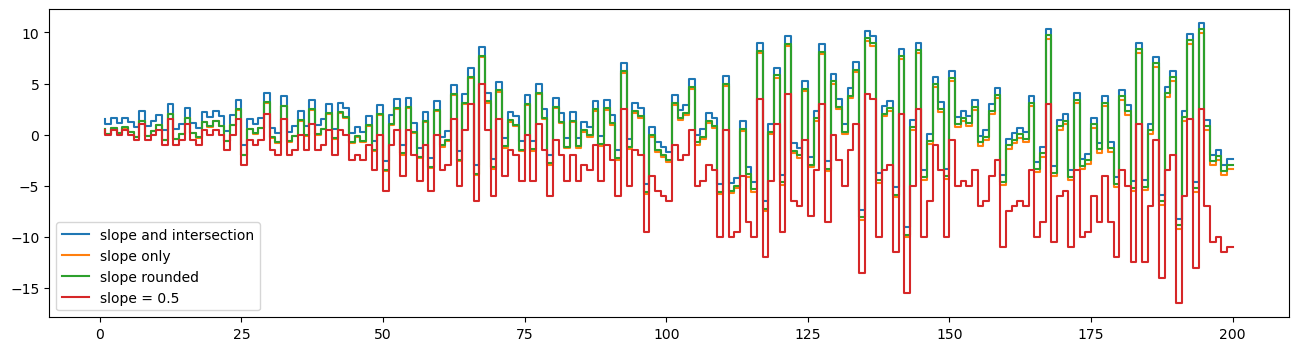

In [27]:
slope, intersection = calculate_slope(G_3_113)
plot_without_slope(G_3_113, slope, intersection, 1/2)

func = -1.4842012410517773 + 0.999996955928044 x


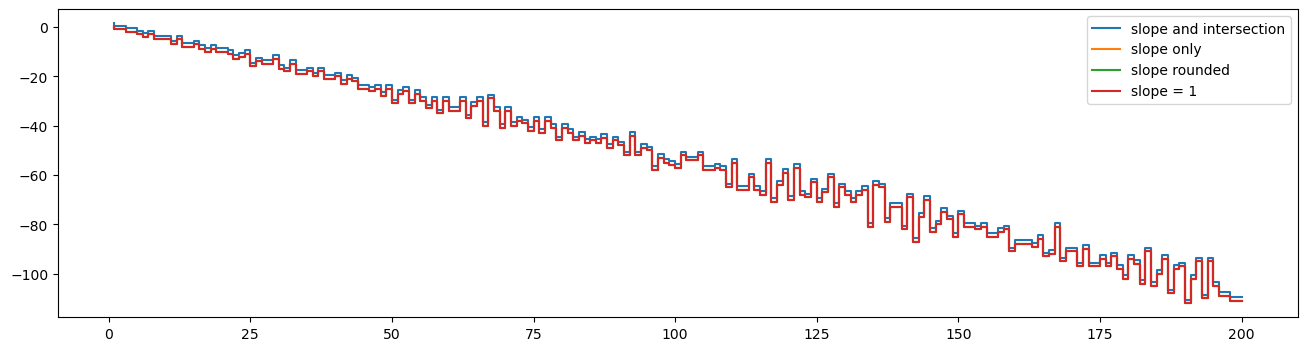

In [28]:
slope, intersection = calculate_slope(G_3_121)
plot_without_slope(G_3_113, slope, intersection, 1)

func = 6.427062867628988 + 0.6885622446345502 x


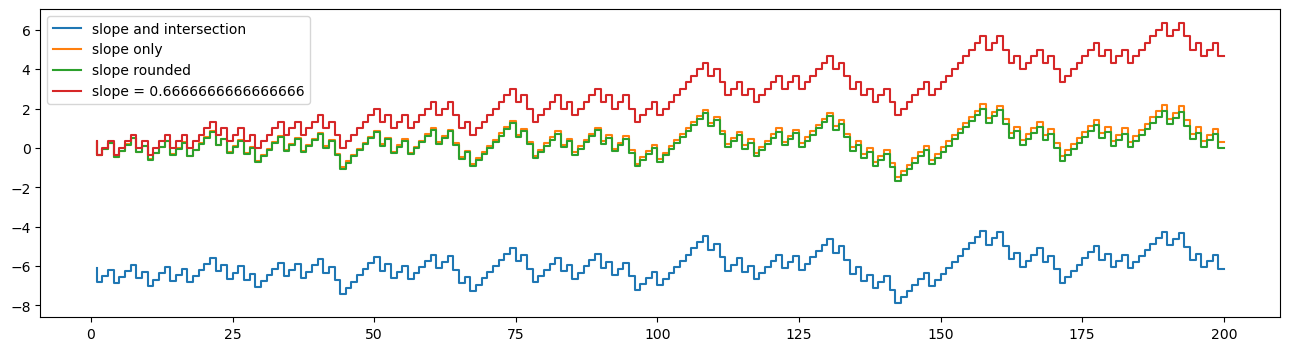

In [29]:
slope, intersection = calculate_slope(G_3_122)
plot_without_slope(G_3_122, slope, intersection, 2/3)

func = -5.8479590023841554 + 0.5215286266578031 x


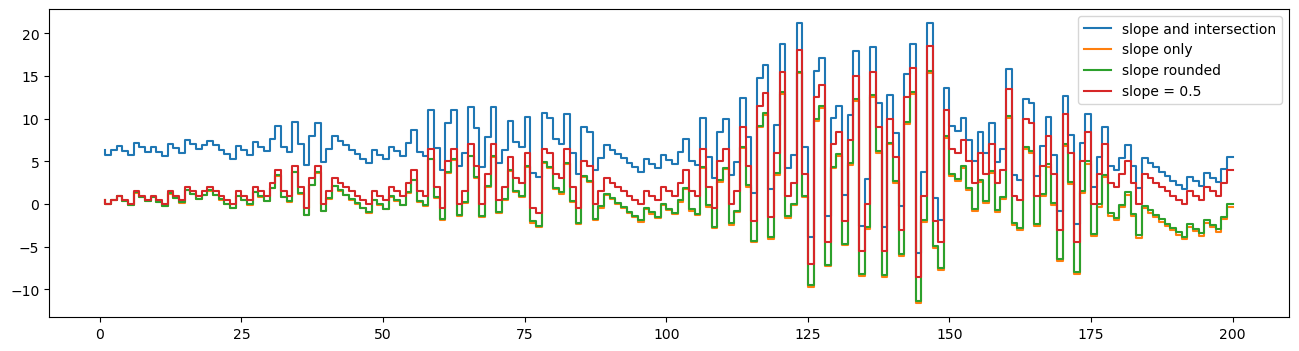

In [30]:
slope, intersection = calculate_slope(G_3_123)
plot_without_slope(G_3_123, slope, intersection, 1/2)

So, it seems that there's some offset between the actual linear slope to the one given by the linear fit

That's reasonable, as the function "hops" above the linear slope. So it's reasonable that the average will be larger.

## Removing the linear trend

Let's try to automatically get the slope, and plot the difference

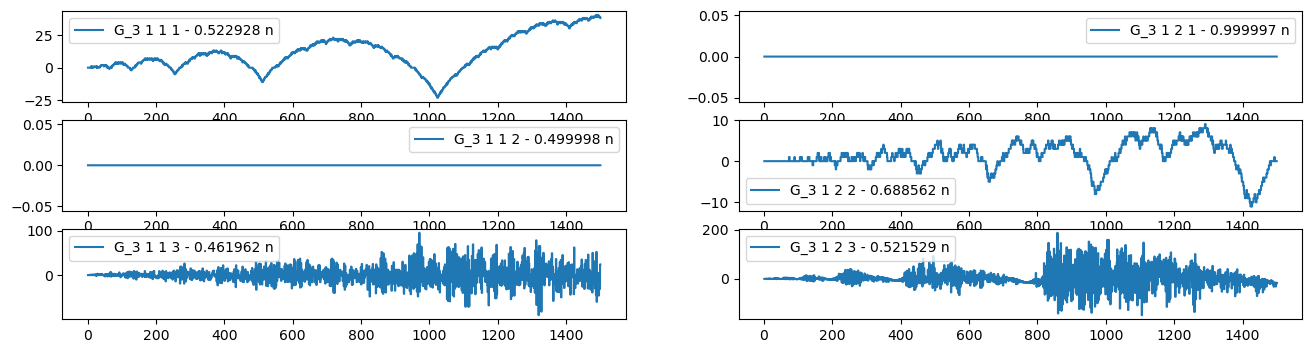

In [31]:
plt.rcParams['figure.figsize'] = [FIG_MAX_Y, 4]

X = np.arange(1, 1_500+1)

nrows = 3  # for [G_3_111, G_3_112, G_3_113] or [G_3_121, G_3_122, G_3_123]
ncols = 2

def _get_slope(func) -> float:
    return calculate_slope(func, silent=True)[0]

def _plot(index: int, func: "Callable"):
    plt.subplot(nrows, ncols, index)

    slope = _get_slope(func)
    func_without_slope = lambda n: func(n) - slope * n
    
    plt.step(X, map_(func_without_slope, X), label=f"{func.name} - {slope:3f} n")
    plt.legend()

_plot(1, G_3_111)
_plot(3, G_3_112)
_plot(5, G_3_113)
_plot(2, G_3_121)
_plot(4, G_3_122)
_plot(6, G_3_123)

Alternatively, we can apply the "Fix" that changes $G_3 111$ to be exactly 0.5

That is, subtract $0.22928$ from the slope

And see what it does to all the other plots

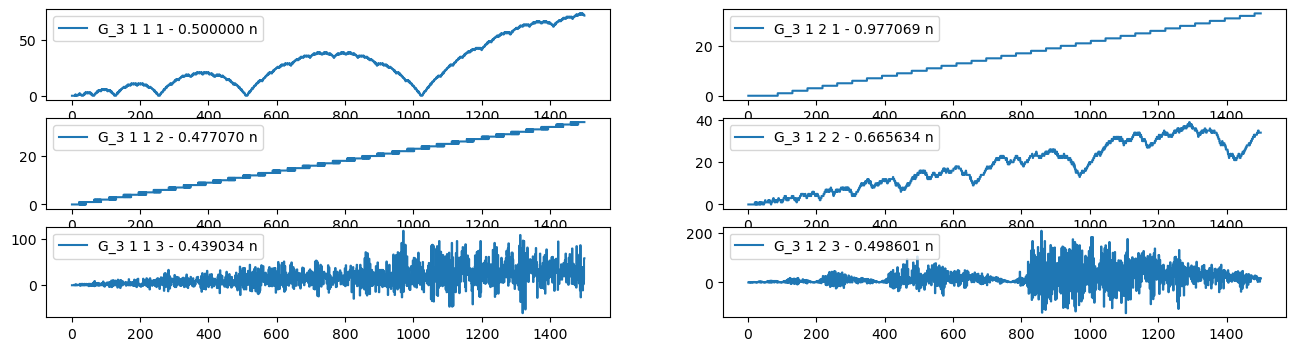

In [32]:
plt.rcParams['figure.figsize'] = [FIG_MAX_Y, 4]

X = np.arange(1, 1_500+1)

nrows = 3  # for [G_3_111, G_3_112, G_3_113] or [G_3_121, G_3_122, G_3_123]
ncols = 2

slope_fix = 0.022928

def _get_slope(func) -> float:
    return calculate_slope(func, silent=True)[0]

def _plot(index: int, func: "Callable"):
    plt.subplot(nrows, ncols, index)

    slope = _get_slope(func) - slope_fix
    func_without_slope = lambda n: func(n) - slope * n
    
    plt.step(X, map_(func_without_slope, X), label=f"{func.name} - {slope:3f} n")
    plt.legend()

_plot(1, G_3_111)
_plot(3, G_3_112)
_plot(5, G_3_113)
_plot(2, G_3_121)
_plot(4, G_3_122)
_plot(6, G_3_123)

Overall, I don't think that that's the exact number

But I do think that $G_3 1xx$, for the same $x$ (e.g. $G_3 111$, $G_3 122$, maybe $G_3 133$) will be the ones that have a "nice" slope ($1/2$, $2/3$, etc)

## Small $G_3 133$ test

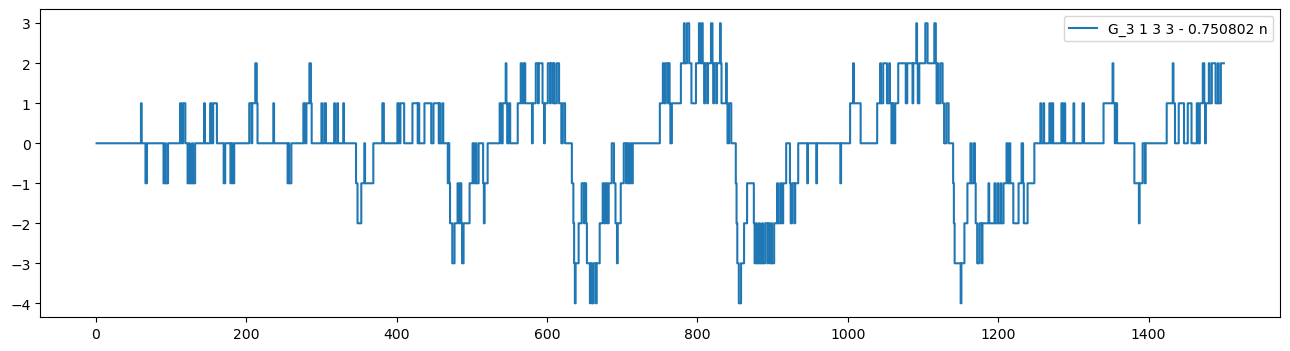

In [33]:
G_3_133 = G_3(1,3,3)
func = G_3_133

slope = _get_slope(func)
func_without_slope = lambda n: func(n) - slope * n

plt.step(X, map_(func_without_slope, X), label=f"{func.name} - {slope:3f} n")
plt.legend()

Awesome! that looks like $3/4$ slope!

Fitting for the pattern:
</br>
The slope for $G_3 1 \alpha \alpha$ is $\frac{\alpha}{\alpha+1}$

# Tetration

[link](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/#:~:text=The%20Ackermann%20function)

<img src="https://content.wolfram.com/sites/43/2024/09/sw09252024primitiveimg7.png" width=400 height=300 />

It's called "The Ackermann function",
so let's call it $ack$

$ack(m,x,y) = ack(m-1,x,ack(m,x,y-1))$

Note from the future:

for $m=2$, we got `RecursionError: maximum recursion depth exceeded`
```
CacheInfo(hits=384, misses=18028, maxsize=10000, currsize=10000)
```
Thus, we set `maxsize = 30K`

In [34]:
@lru_cache(maxsize=30_000)
def ack(m, x, y):
    if m == 0:
        return x+y
    if m == 1 and y == 0:
        return 0
    if m == 2 and y == 0:
        return 1
    if y == 0:
        return x
    return ack(m-1 , x , ack(m, x, y-1))

## Plotting $m=0$ : Addition

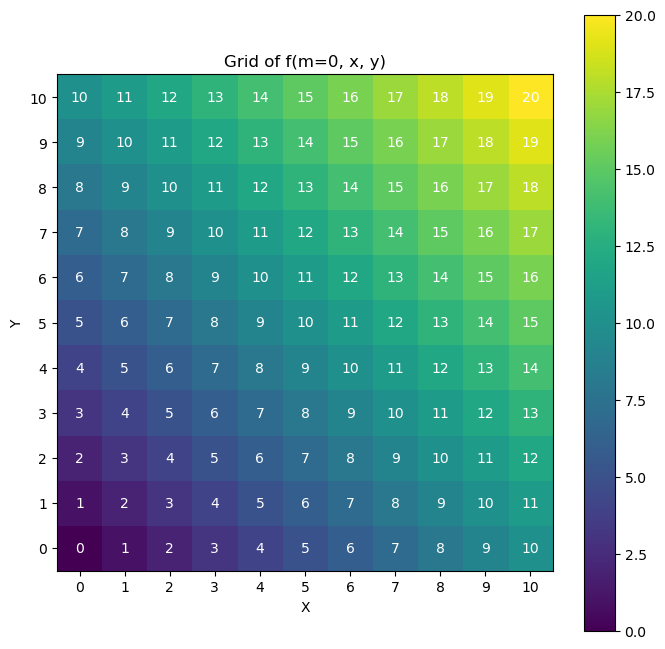

In [35]:
M = 0
X = np.arange(0, 10+1)
Y = np.arange(0, 10+1)

values = np.array([[ack(M, x, y) for x in X] for y in Y])

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(values, cmap='viridis', origin='lower')

# Show the values in each grid cell
for i in range(len(X)):
    for j in range(len(Y)):
        ax.text(i, j, f"{values[j, i]}", ha='center', va='center', color='white')

# Add labels and title
ax.set_xticks(np.arange(len(X)))
ax.set_yticks(np.arange(len(Y)))
ax.set_xticklabels(X)
ax.set_yticklabels(Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Grid of f(m=0, x, y)')

# Display the colorbar
plt.colorbar(im, ax=ax)

## Plotting $m=1,2,3$

In [36]:
def plot_map(m, max_x=10, max_y=10):
    X = np.arange(0, max_x+1)
    Y = np.arange(0, max_y+1)

    values = np.array([[ack(m, x, y) for x in X] for y in Y])
    
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(values, cmap='viridis', origin='lower')
    
    # Show the values in each grid cell
    for i in range(len(X)):
        for j in range(len(Y)):
            ax.text(i, j, f"{values[j, i]}", ha='center', va='center', color='white')
    
    # Add labels and title
    ax.set_xticks(np.arange(len(X)))
    ax.set_yticks(np.arange(len(Y)))
    ax.set_xticklabels(X)
    ax.set_yticklabels(Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Grid of f(m={m}, x, y)')
    
    # Display the colorbar
    plt.colorbar(im, ax=ax)

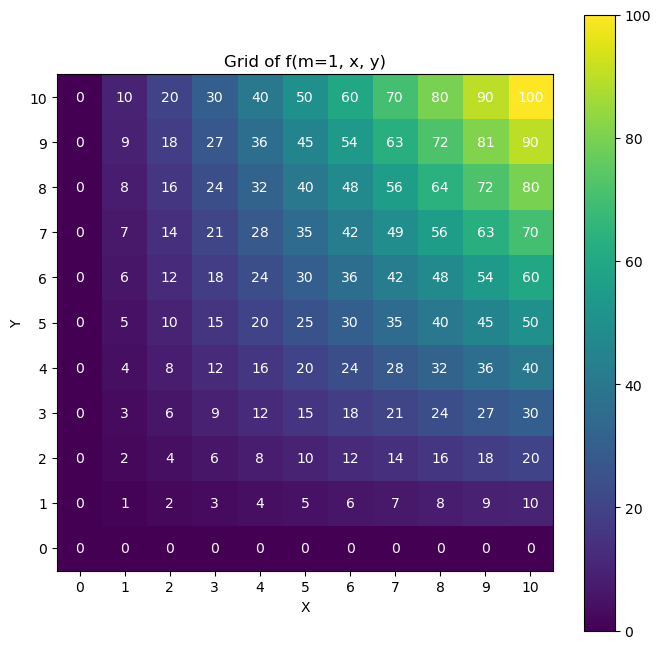

In [37]:
plot_map(1)

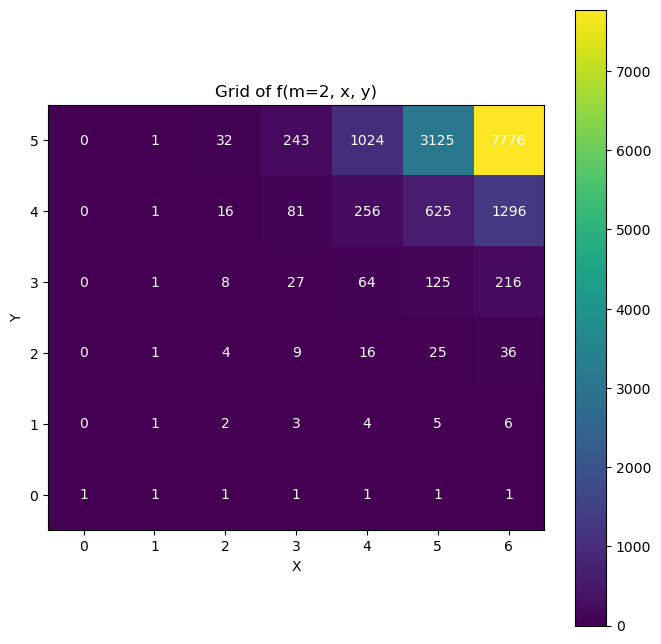

In [38]:
plot_map(2, 6, 5)

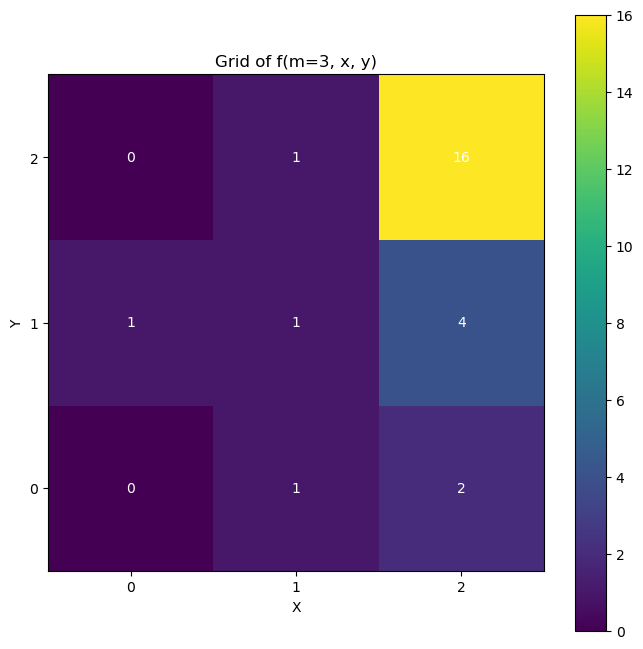

In [39]:
plot_map(3, 2, 2)

In [40]:
ack.cache_info()

CacheInfo(hits=238, misses=4805, maxsize=30000, currsize=4805)

## Beyond Tetration

`m=2`
</br>
$3^1$

In [41]:
print( 3 ** 1 )
print( ack(2, 3, 1) )

3
3


</br>

`m=3`
</br>
$^1 3 == 3 \uparrow \uparrow 1$
</br>
$3 \uparrow \uparrow 1 = 3 \uparrow 3 = 3^3$

In [42]:
print( 3 ** 3 )
print( ack(3, 3, 1) )

27
27


</br>

`m=4`
</br>
$3 \uparrow \uparrow \uparrow 1$
</br>
$3 \uparrow \uparrow \uparrow 1 = 3 \uparrow \uparrow 3 = 3^{3^3}$

In [43]:
print(3 ** (3 ** 3))

7625597484987


`m=5`
</br>
Not even trying.
Wikipedia has the answers:
[link](https://en.wikipedia.org/wiki/Tetration#Examples)

# The Q Sequence

[link](https://writings.stephenwolfram.com/2024/09/nestedly-recursive-functions/#:~:text=there%20was%20the%20Q%20sequence)

<img src="https://content.wolfram.com/sites/43/2024/09/sw09242024historyimg13.png" width=400 height=300 />

In [44]:
@lru_cache(maxsize=10_000)
def Q(n):
    if n in (1,2):
        return 1
    return Q(n - Q(n-1)) + Q(n - Q(n-2))

In [45]:
list(map(Q, range(1, 22)))

[1, 1, 2, 3, 3, 4, 5, 5, 6, 6, 6, 8, 8, 8, 10, 9, 10, 11, 11, 12, 12]

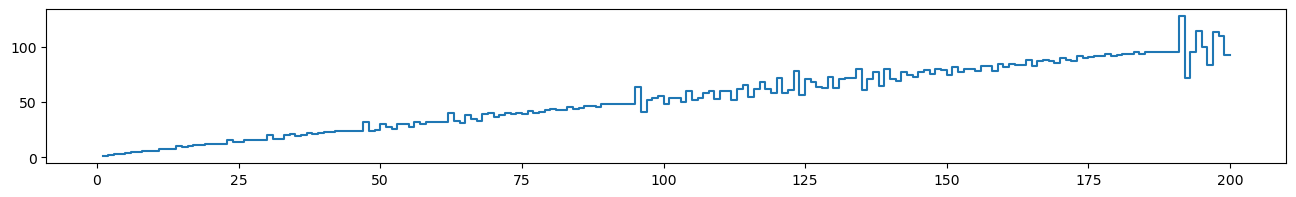

In [46]:
plt.rcParams['figure.figsize'] = [FIG_MAX_Y, FIG_DEFAULT_X]

X = np.arange(1, 200+1)
plt.step(X, map_(Q,X))

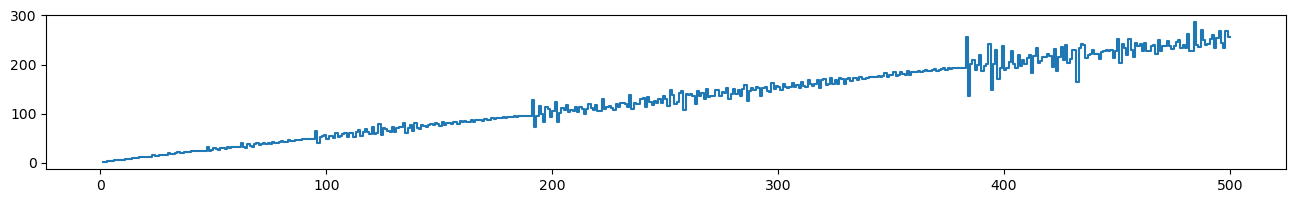

In [47]:
X = np.arange(1, 500+1)
plt.step(X, map_(Q,X))

## Removing linear trend

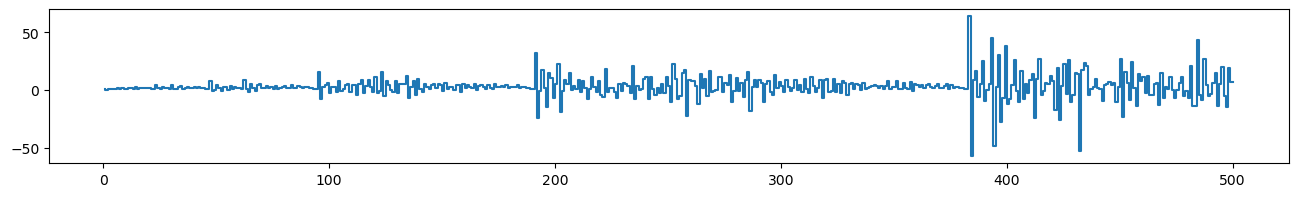

In [48]:
plt.rcParams['figure.figsize'] = [FIG_MAX_Y, FIG_DEFAULT_X]

X = np.arange(1, 500+1)
plt.step(X, map_(Q,X) - X/2)